<a href="https://colab.research.google.com/github/manikbali/ComputerVision/blob/main/Image_Classification_using_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

tf.compat.v1.disable_eager_execution()

In [6]:
#train_images, train_labels = mnist.load_training()
#test_images, test_labels = mnist.load_testing()
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
test_images=np.array(test_images).astype('float32')/255.0
test_labels=np.array(test_labels)
# Set Number of training images
Number_of_train_images=10000
#Read and Load in MNIST data into train_images and train_labels
train_images=np.array(train_images[0:Number_of_train_images]).astype('float32')/255
train_labels=np.array(train_labels[0:Number_of_train_images])

In [8]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images =  test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [9]:
model = tf.keras.Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 12s 1ms/sample - loss: 0.4516 - accuracy: 0.8664
Epoch 2/10
10000/10000 [==============================] - 7s 686us/sample - loss: 0.1972 - accuracy: 0.9406
Epoch 3/10
10000/10000 [==============================] - 6s 557us/sample - loss: 0.1310 - accuracy: 0.9587
Epoch 4/10
10000/10000 [==============================] - 7s 687us/sample - loss: 0.0925 - accuracy: 0.9711
Epoch 5/10
10000/10000 [==============================] - 6s 563us/sample - loss: 0.0624 - accuracy: 0.9812
Epoch 6/10
10000/10000 [==============================] - 7s 686us/sample - loss: 0.0509 - accuracy: 0.9851
Epoch 7/10
10000/10000 [==============================] - 6s 557us/sample - loss: 0.0369 - accuracy: 0.9891
Epoch 8/10
10000/10000 [==============================] - 7s 677us/sample - loss: 0.0271 - accuracy: 0.9918
Epoch 9/10
10000/10000 [==============================] - 6s 619us/sample - loss: 0.0209 - accuracy: 0.9943
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


9


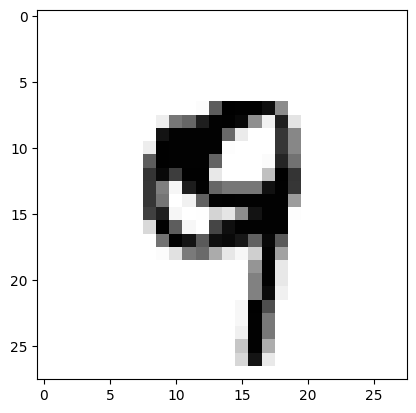

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=train_images,y=train_labels, epochs=10)

model.evaluate(test_images, test_labels)

image_index = 4444
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())